## FEATURE SELECTION WITH MUTUAL INFORMATION SCORES

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### READ THE DATASET --> TRAIN TITANIC

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
s= df.isna().sum()
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### SEPERATE X AND Y FEATURE FROM DATASET

In [5]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'])
Y = df[['Survived']]

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### SEPERATE categorical and continous feature

In [8]:
cat=list(X.columns[X.dtypes=='object'])
con= list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Sex', 'Cabin', 'Embarked']

In [10]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [11]:
cat1= ['Cabin']
cat2= ['Sex','Embarked']

### CREATE FIRST PIPELINE

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])
cat_pipe1= Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ord',OrdinalEncoder())])
cat_pipe2= Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ord',OrdinalEncoder())])
pre1= ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

In [14]:
x_pre= pre1.fit_transform(X)
x_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.47000000e+02,  1.00000000e+00,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         8.10000000e+01,  0.00000000e+00,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         1.47000000e+02,  0.00000000e+00,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         1.47000000e+02,  0.00000000e+00,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         6.00000000e+01,  1.00000000e+00,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.47000000e+02,  1.00000000e+00,  1.00000000e+00]])

In [15]:
cols= pre1.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Cabin', 'cat2__Sex', 'cat2__Embarked'], dtype=object)

In [16]:
x_pre=pd.DataFrame(x_pre,columns=cols)
x_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin,cat2__Sex,cat2__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,147.0,1.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,81.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,147.0,0.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,55.0,0.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,147.0,1.0,2.0
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,147.0,1.0,2.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,30.0,0.0,2.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,147.0,0.0,2.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,60.0,1.0,0.0


### CALCULATING THE MUTUAL INFORMATION SCORES

In [17]:
from sklearn.feature_selection import mutual_info_classif

In [18]:
mf= mutual_info_classif(x_pre,Y)
mf

array([0.07425268, 0.00521935, 0.0366384 , 0.03546668, 0.13817107,
       0.05916731, 0.14507961, 0.01803475])

In [19]:
mf=pd.Series(mf)
mf.index=cols


In [20]:
mf=mf.sort_values(ascending=False)
mf

cat2__Sex         0.145080
num__Fare         0.138171
num__Pclass       0.074253
cat1__Cabin       0.059167
num__SibSp        0.036638
num__Parch        0.035467
cat2__Embarked    0.018035
num__Age          0.005219
dtype: float64

<Axes: >

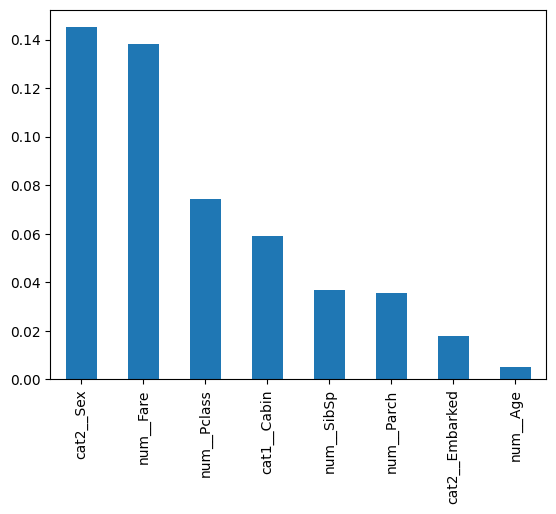

In [21]:
mf.plot(kind='bar')

In [22]:
sel_cols= list(mf[0:6].index)
sel_cols

['cat2__Sex',
 'num__Fare',
 'num__Pclass',
 'cat1__Cabin',
 'num__SibSp',
 'num__Parch']

### 2ND APPORACH FOR SELECTING COLUMNS

In [23]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif,k=6)
sel.fit_transform(x_pre,Y)
sel_cols=sel.get_feature_names_out()
sel_cols

array(['num__Pclass', 'num__Age', 'num__Parch', 'num__Fare',
       'cat1__Cabin', 'cat2__Sex'], dtype=object)

In [24]:
imp_cols=[]

In [25]:
sel_cols[0].split('__')[1]

'Pclass'

In [26]:
for i in sel_cols:
    s= i.split('__')[1]
    imp_cols.append(s)

In [27]:
imp_cols

['Pclass', 'Age', 'Parch', 'Fare', 'Cabin', 'Sex']

In [28]:
x_sel= X[imp_cols]
x_sel

,Pclass,Age,Parch,Fare,Cabin,Sex
0,3,22.0,0,7.2500,NaN,male
1,1,38.0,0,71.2833,C85,female
2,3,26.0,0,7.9250,NaN,female
3,1,35.0,0,53.1000,C123,female
4,3,35.0,0,8.0500,NaN,male
...,...,...,...,...,...,...
886,2,27.0,0,13.0000,NaN,male
887,1,19.0,0,30.0000,B42,female
888,3,NaN,2,23.4500,NaN,female
889,1,26.0,0,30.0000,C148,male


In [29]:
cat_sel=list(x_sel.columns[x_sel.dtypes=='object'])
con_sel=list(x_sel.columns[x_sel.dtypes!='object'])
cat_sel1=['Cabin']
cat_sel2= ['Sex']

### CREATING FINAL PIPELINE

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
num_pipe1= Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])
cat1_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
cat2_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
pre2= ColumnTransformer([('num',num_pipe1,con_sel),
                         ('cat1',cat1_pipe,cat_sel1),
                         ('cat2',cat2_pipe,cat_sel2)])

In [32]:
x_sel_pre= pre2.fit_transform(x_sel).toarray()
x_sel_pre

array([[ 0.82737724, -0.56573646, -0.47367361, ...,  1.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103, -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.47367361, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  2.00893337, ...,  1.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.20276197, -0.47367361, ...,  1.        ,
         0.        ,  1.        ]])

In [33]:
final_cols= pre2.get_feature_names_out()
final_cols

array(['num__Pclass', 'num__Age', 'num__Parch', 'num__Fare',
       'cat1__Cabin_A10', 'cat1__Cabin_A14', 'cat1__Cabin_A16',
       'cat1__Cabin_A19', 'cat1__Cabin_A20', 'cat1__Cabin_A23',
       'cat1__Cabin_A24', 'cat1__Cabin_A26', 'cat1__Cabin_A31',
       'cat1__Cabin_A32', 'cat1__Cabin_A34', 'cat1__Cabin_A36',
       'cat1__Cabin_A5', 'cat1__Cabin_A6', 'cat1__Cabin_A7',
       'cat1__Cabin_B101', 'cat1__Cabin_B102', 'cat1__Cabin_B18',
       'cat1__Cabin_B19', 'cat1__Cabin_B20', 'cat1__Cabin_B22',
       'cat1__Cabin_B28', 'cat1__Cabin_B3', 'cat1__Cabin_B30',
       'cat1__Cabin_B35', 'cat1__Cabin_B37', 'cat1__Cabin_B38',
       'cat1__Cabin_B39', 'cat1__Cabin_B4', 'cat1__Cabin_B41',
       'cat1__Cabin_B42', 'cat1__Cabin_B49', 'cat1__Cabin_B5',
       'cat1__Cabin_B50', 'cat1__Cabin_B51 B53 B55',
       'cat1__Cabin_B57 B59 B63 B66', 'cat1__Cabin_B58 B60',
       'cat1__Cabin_B69', 'cat1__Cabin_B71', 'cat1__Cabin_B73',
       'cat1__Cabin_B77', 'cat1__Cabin_B78', 'cat1__Cabin_B79

In [34]:
x_sel_pre=pd.DataFrame(x_sel_pre,columns=final_cols)
x_sel_pre

,num__Pclass,num__Age,num__Parch,num__Fare,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,cat1__Cabin_A23,...,cat1__Cabin_F G73,cat1__Cabin_F2,cat1__Cabin_F33,cat1__Cabin_F38,cat1__Cabin_F4,cat1__Cabin_G6,cat1__Cabin_T,cat1__Cabin_unknown,cat2__Sex_female,cat2__Sex_male
0,0.827377,-0.565736,-0.473674,-0.502445,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.566107,0.663861,-0.473674,0.786845,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.827377,-0.258337,-0.473674,-0.488854,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-1.566107,0.433312,-0.473674,0.420730,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.827377,0.433312,-0.473674,-0.486337,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.473674,-0.386671,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
887,-1.566107,-0.796286,-0.473674,-0.044381,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0.827377,-0.104637,2.008933,-0.176263,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
889,-1.566107,-0.258337,-0.473674,-0.044381,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### TRAIN TEST SPLIT

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x_sel_pre,Y,test_size=0.3,random_state=21)


In [36]:
xtrain.shape

(623, 154)

In [37]:
xtest.shape

(268, 154)

### CREATING FINAL MODEL

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=21)
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=21)

In [39]:
gbc.score(xtrain,ytrain)

0.8940609951845907

In [40]:
gbc.score(xtest,ytest)

0.8544776119402985

### HYPERPARAMETER TUNNING

In [41]:
params={'learning_rate':[0.01,0.05,0.1,0.2],
        'max_depth':[2,3,4,5,6,7,8],
        'min_samples_split':[2,3,4,5,6,7,8,9,10]}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
base_gbc= GradientBoostingClassifier(random_state=21)
rscv= RandomizedSearchCV(base_gbc,param_distributions=params,cv=5,scoring='f1',random_state=21)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   random_state=21, scoring='f1')

In [83]:
rscv.best_params_

{'min_samples_split': 2, 'max_depth': 8, 'learning_rate': 0.05}

In [84]:
rscv.best_score_

0.7416903236827836

In [85]:
best_model=rscv.best_estimator_
best_model

GradientBoostingClassifier(learning_rate=0.05, max_depth=8, random_state=21)

In [86]:
best_model.score(xtrain,ytrain)

0.9406099518459069

In [87]:
best_model.score(xtest,ytest)

0.8470149253731343

### PREDICT TRAINING AND TESTING DATA

In [88]:
ypred_tr=best_model.predict(xtrain)
ypred_ts= best_model.predict(xtest)

In [89]:
ypred_tr[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [90]:
ytrain.head()

,Survived
241,1
734,0
581,1
456,0
118,0


In [91]:
ypred_ts[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [92]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


### CONFUSION MATRIX

In [93]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

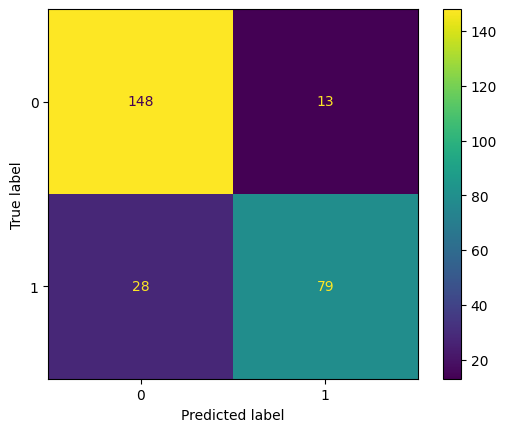

In [94]:
cf= confusion_matrix(ytest,ypred_ts)
cfd= ConfusionMatrixDisplay(cf,display_labels=best_model.classes_)
cfd.plot()

### CLASSIFICATION REPORT 

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       161
           1       0.86      0.74      0.79       107

    accuracy                           0.85       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.85      0.85      0.84       268



### PREDICTIONS ON TEST TITANIC DATASET

In [98]:
xnew= pd.read_csv('test_titanic.csv')
x_new= pre2.transform(xnew).toarray()
xnew_pre= pd.DataFrame(x_new,columns=final_cols)
xnew_pre


,num__Pclass,num__Age,num__Parch,num__Fare,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,cat1__Cabin_A23,...,cat1__Cabin_F G73,cat1__Cabin_F2,cat1__Cabin_F33,cat1__Cabin_F38,cat1__Cabin_F4,cat1__Cabin_G6,cat1__Cabin_T,cat1__Cabin_unknown,cat2__Sex_female,cat2__Sex_male
0,0.827377,0.394887,-0.473674,-0.490783,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.827377,1.355510,-0.473674,-0.507479,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.369365,2.508257,-0.473674,-0.453367,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.827377,-0.181487,-0.473674,-0.474005,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.827377,-0.565736,0.767630,-0.401017,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.104637,-0.473674,-0.486337,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
414,-1.566107,0.740711,-0.473674,1.544246,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
415,0.827377,0.702286,-0.473674,-0.502445,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
416,0.827377,-0.104637,-0.473674,-0.486337,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### PREDICTIONS

In [99]:
pred= best_model.predict(xnew_pre)
pred[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [100]:
prob= best_model.predict_proba(xnew_pre)[:,1]

In [101]:
df_results= xnew[['PassengerId']]
df_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [102]:
df_results['Survived']=pred
df_results['Probability']=prob

In [103]:
df_results

,PassengerId,Survived,Probability
0,892,0,0.088129
1,893,0,0.167310
2,894,0,0.336530
3,895,0,0.125657
4,896,1,0.783556
...,...,...,...
413,1305,0,0.090703
414,1306,1,0.977321
415,1307,0,0.070917
416,1308,0,0.090703


<Axes: title={'center': 'Survival bar graph'}, ylabel='Survived'>

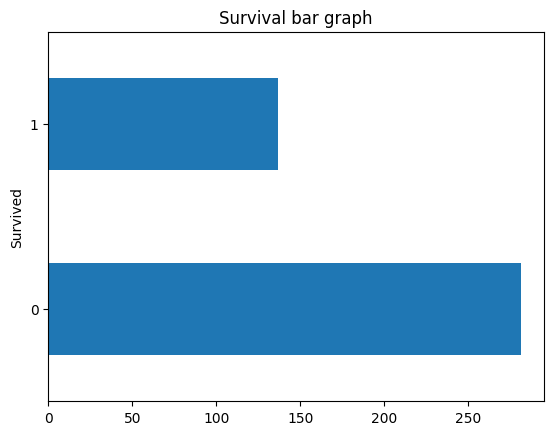

In [107]:
df_results['Survived'].value_counts().plot(kind='barh',title='Survival bar graph')

In [108]:
df_results.to_csv('Predictions.csv',index=False)